<a href="https://colab.research.google.com/github/alyxxxv/Data-Analyst-Portfolio/blob/main/linear_regresion_marketing_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Marketing Sales Using Linear Regression**

Ini merupakan source code untuk tugas 2 mata kuliah 2. 
Link Dataset : https://www.kaggle.com/datasets/fayejavad/marketing-linear-multiple-regression

**Import Package**

In [ ]:
import numpy as np # linear algebra
import math as m #import matematika 
import pandas as pd # data processing, read CSV file, 
import matplotlib.pyplot as plt #untuk visualisasi data
import seaborn as sns #untuk visualisasi data 
from sklearn.linear_model import LinearRegression #machine learning untuk regresi
import warnings
warnings.filterwarnings('ignore')

**DATA UNDERSTANDING**

Pada tahapan ini, kita memahami data yang akan kita gunakan. pertama, data ini akan kita baca dan ditampilkan. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pada data dibawah ini, youtube, facebook, dan newspaper merupakan biaya iklan media sosial yang dikeluarkan oleh tiap perusahaan. Sedangkan sales adalah data hasil penjualan tersebut. Disini, bahwa biaya iklan 'youtube', 'facebook', dan 'newspaper' merupakan data independent, dan 'sales' merupakan data dependent. 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data csv/Marketing_Data (1).csv') #load the data
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [ ]:
df.info() #informasi mengenai data yang digunakan dan cek missing value. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
#melihat deskriptif analisis 
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


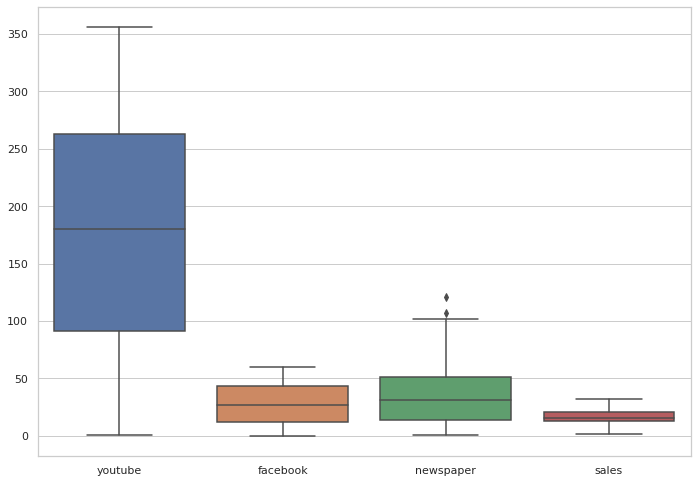

In [ ]:
#check apakah ada data yang outlier dengan visualisasi data 
def show_bloxpot(df):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_theme(style="whitegrid")
    sns.boxplot(data=df)

show_bloxpot(df)

ternyata ada outlier pada bagian newspaper. untuk itu, maka kita harus menyesuaikan datanya dengan cara mengganti data tersebut. 

In [ ]:
#data preprocessing. mengganti outlier dengan code dibawah ini 
Q1=df['newspaper'].quantile(0.25)
Q3=df['newspaper'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

13.739999999999998
50.879999999999995
37.14
-41.97 106.59


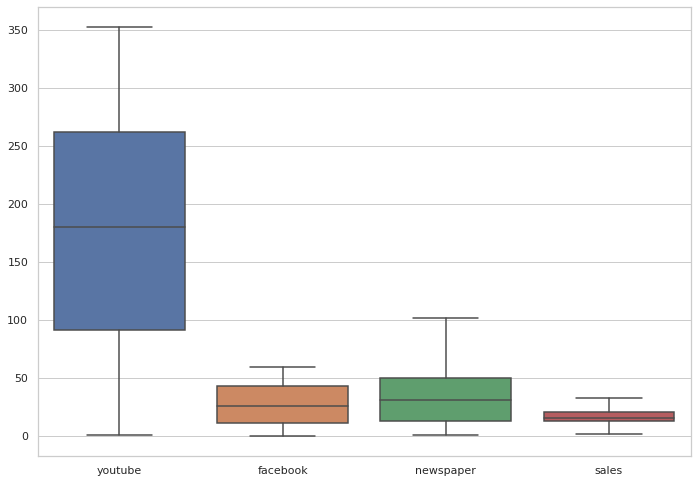

In [ ]:
#plot visualisasi data. apakah masih ada outlier. 
df1 = df[(df['newspaper']< Upper_Whisker) & (df['newspaper']> Lower_Whisker)] #menyimpan data baru tanpa outlier dengan df1
show_bloxpot(df1) 

In [ ]:
#mengetahui deskriptif statistik dari data yang baru. 
df1.describe()

,youtube,facebook,newspaper,sales
count,169.000000,169.000000,169.000000,169.000000
mean,177.903195,27.431006,34.305799,16.892308
std,101.414376,17.874627,23.492735,6.268315
min,0.840000,0.000000,0.360000,1.920000
25%,91.560000,11.520000,13.200000,12.600000
50%,179.760000,26.040000,30.720000,15.480000
75%,262.200000,42.960000,49.680000,20.760000
max,352.320000,59.520000,101.760000,32.400000


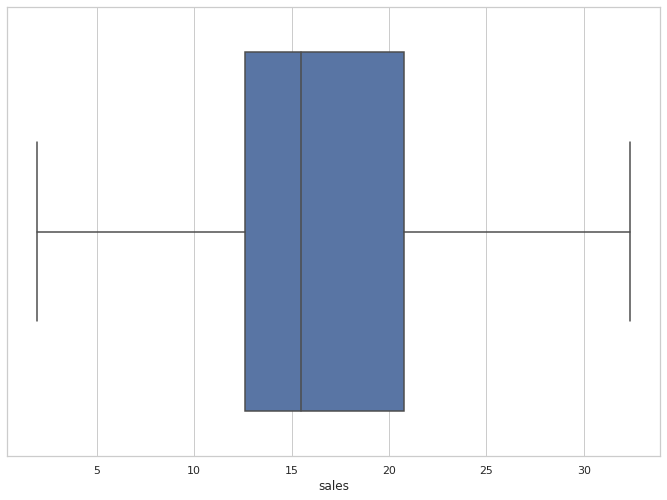

In [ ]:
#menunjukkan bloxplot sales 
sns.boxplot(df1['sales'])
plt.show()

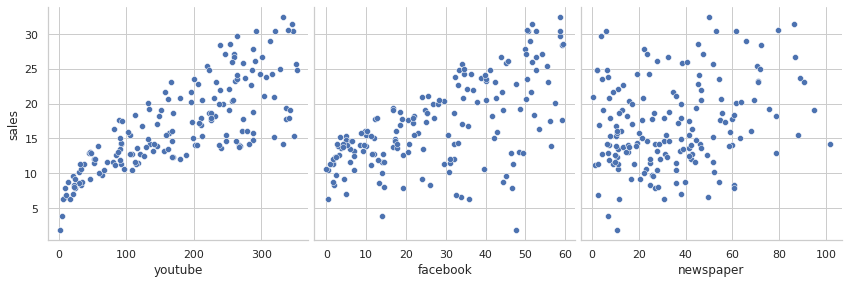

In [ ]:
#Visualisasi data untuk mengetahui hubungan biaya yang dikeluarkan marketing melalui youtube, facebook, dan newspaper berpengaruh terhadap Sales. 
sns.pairplot(df1, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

Setelah itu, cek korelasi dari masing-masing variabel. adapun heatmapnya adalah sebagai berikut:

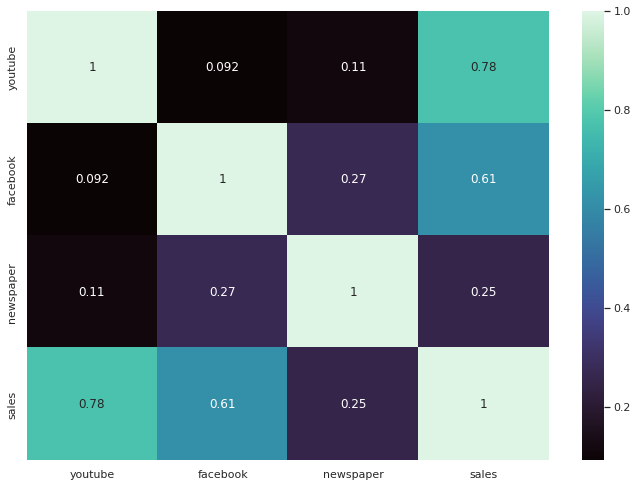

In [ ]:
#plot nilai korelasi antar beberapa variabel youtube, facebook, newspaper terhadap sales 
sns.heatmap(df1.corr(), cmap="mako", annot = True)
plt.show()

dari data tersebut, dapat dilihat bahwa youtube memiliki tingkat korelasi yang tinggi dibandingkan facebook dan newspaper. 

# **MEMBUAT MODEL LINEAR REGRESI**

In [ ]:
X = df1[['youtube', 'facebook', 'newspaper']] #Variabel independent
y = df1['sales'] #variabel dependent

**Training Data**

In [ ]:
#Training data 
from sklearn import linear_model #untuk machine learning
from sklearn.model_selection import train_test_split
 #membagi data ke dalam train dan test dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
model = linear_model.LinearRegression() #model linear regression 
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#print nilai koefisien, intersept, dan score. 
print('coef= ', model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

coef=  [0.04524399 0.1801332  0.01259741]
intercept=  3.4471244981063442
score=  0.9117613771348234


**Test Data**

pada kali ini, menampilkan hasil prediksi sales dan dibandingan hasil sales sebenarnya. 

In [ ]:
#menampilkan nilai aktual dan hasil prediksi. 
predictedsales = pd.DataFrame(model.predict(X_test), columns=['predicted sales']) # Create new dataframe of column'Predicted Weight'
actualsales = pd.DataFrame(y_test)
actualsales = actualsales.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualsales,predictedsales],axis =1)
df_actual_vs_predicted

,sales,predicted sales
0,13.92,16.357472
1,8.64,7.631174
2,22.80,21.898931
3,10.56,7.940481
4,8.28,5.598951
5,15.48,15.097870
6,30.48,27.481254
7,28.44,25.831269
8,24.84,23.874068
9,19.92,19.739471


**VISUALISASI DATA **

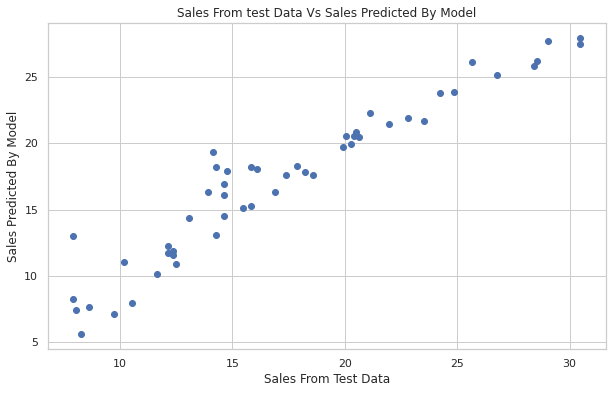

In [ ]:
#Visualisasi Data Hasil Prediksi dengan Hasil Sebenarnya
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Sales From Test Data')
plt.ylabel('Sales Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Sales From test Data Vs Sales Predicted By Model")
plt.show()

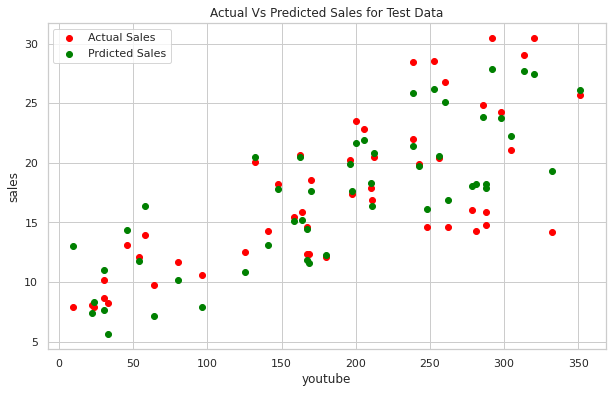

In [ ]:
plt.scatter(X_test['youtube'], y_test, color='red', label = 'Actual Sales')
plt.scatter(X_test['youtube'], model.predict(X_test), color='green', label = 'Prdicted Sales')
plt.xlabel('youtube')
plt.ylabel('sales')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Sales for Test Data')
plt.legend()
plt.show()

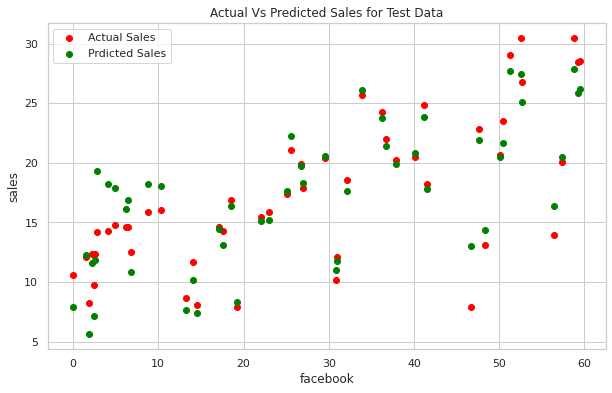

In [ ]:
plt.scatter(X_test['facebook'], y_test, color='red', label = 'Actual Sales')
plt.scatter(X_test['facebook'], model.predict(X_test), color='green', label = 'Prdicted Sales')
plt.xlabel('facebook')
plt.ylabel('sales')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Sales for Test Data')
plt.legend()
plt.show()

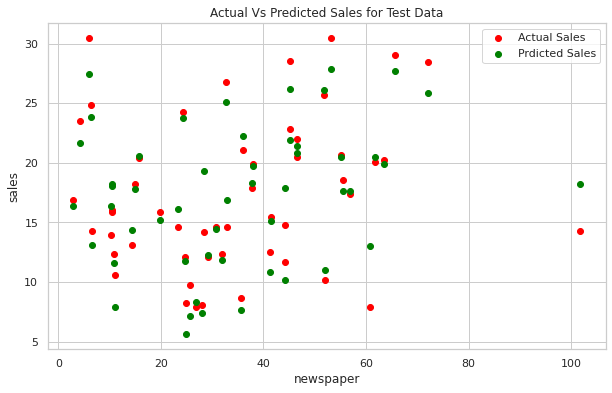

In [ ]:
plt.scatter(X_test['newspaper'], y_test, color='red', label = 'Actual Sales')
plt.scatter(X_test['newspaper'], model.predict(X_test), color='green', label = 'Prdicted Sales')
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Sales for Test Data')
plt.legend()
plt.show()

**EVALUASI MODEL**

In [ ]:
#print nilai MAE, MSE, dan RMSE
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictedsales))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictedsales))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictedsales)))

Mean Absolute Error: 1.394264674144806
Mean Squared Error: 3.437208111494326
Root Mean Squared Error: 1.8539709036266794
